In [1]:
import os

In [2]:
data = os.listdir('../Data/0325updated.task1train(626p)-20251119T175414Z-1-001/grayscale_standardized_data')

In [3]:
data

['X51006557193.png',
 'X51005757235.png',
 'X51005677334.png',
 'X51006311764(1).txt',
 'X51005447861.png',
 'X51005200938.txt',
 'X51005605285.txt',
 'X51005719856.txt',
 'X51005717526.png',
 'X51007103675.txt',
 'X51006334926.txt',
 'X51007339135.png',
 'X51005442384.png',
 'X51007339111.png',
 'X51008164525.txt',
 'X51006556828.txt',
 'X51005719896.txt',
 'X51005711456.png',
 'X51006334926(3).txt',
 'X51005677332(1).png',
 'X51008142068.txt',
 'X51005605286(3).png',
 'X51006619862.txt',
 'X51005677339(2).txt',
 'X51006556831.txt',
 'X51008145450.txt',
 'X51005715451.png',
 'X51005442361.txt',
 'X51007339166.txt',
 'X51005677335.png',
 'X51005724627.txt',
 'X51005361950(1).png',
 'X51006557199.png',
 'X51006557213.txt',
 'X51007846307.txt',
 'X51005711456.txt',
 'X51007846301.txt',
 'X51008164525.png',
 'X51005663273.png',
 'X51005361907(1).png',
 'X51008099054.png',
 'X51006008057.png',
 'X51005663293.png',
 'X51007339167(1).txt',
 'X51007339166.png',
 'X51006557188.txt',
 'X5100638

In [4]:
len(data)

1408

In [9]:
import cv2
image = cv2.imread('../Data/0325updated.task1train(626p)-20251119T175414Z-1-001/0325updated.task1train(626p)/X51005719862.jpg')

with open('../Data/0325updated.task1train(626p)-20251119T175414Z-1-001/0325updated.task1train(626p)/X51005719862.txt', 'r') as f:
    bbox_data = f.read().strip().split()

In [10]:
image_path = '../Data/0325updated.task1train(626p)-20251119T175414Z-1-001/0325updated.task1train(626p)/X51005719862.jpg'
txt_path = '../Data/0325updated.task1train(626p)-20251119T175414Z-1-001/0325updated.task1train(626p)/X51005719862.txt'

Total bounding boxes found: 31
Box 1: Text = '99 SPEED MART S/B (519537-X)'
Box 2: Text = 'LOT P. T. 2811, JALAN ANGSA,'
Box 3: Text = 'TAMAN BERKELEY'
Box 4: Text = '41150 KLANG, SELANGOR'
Box 5: Text = '1934-LAMAN RIMBUNAN'
Box 6: Text = 'GST ID. NO : 000181747712'
Box 7: Text = 'INVOICE NO : 18297/102/T0173'
Box 8: Text = '02:56PM'
Box 9: Text = '566719'
Box 10: Text = '03-02-18'
Box 11: Text = '2485 LABOOST DRINKING WATER'
Box 12: Text = 'RM.50'
Box 13: Text = 'S'
Box 14: Text = '7094 NEOBUN PLASTER 10PCS'
Box 15: Text = 'RM3.20'
Box 16: Text = 'S'
Box 17: Text = 'TOTAL SALES (INCLUSIVE GST)'
Box 18: Text = 'CASH'
Box 19: Text = 'CHANGE'
Box 20: Text = 'RM'
Box 21: Text = 'RM'
Box 22: Text = 'RM'
Box 23: Text = '3.70'
Box 24: Text = '10.00'
Box 25: Text = '6.30'
Box 26: Text = 'GST SUMMARY'
Box 27: Text = 'S = 6%'
Box 28: Text = 'AMOUNT (RM)'
Box 29: Text = '3.49'
Box 30: Text = 'TAX (RM)'
Box 31: Text = '.21'


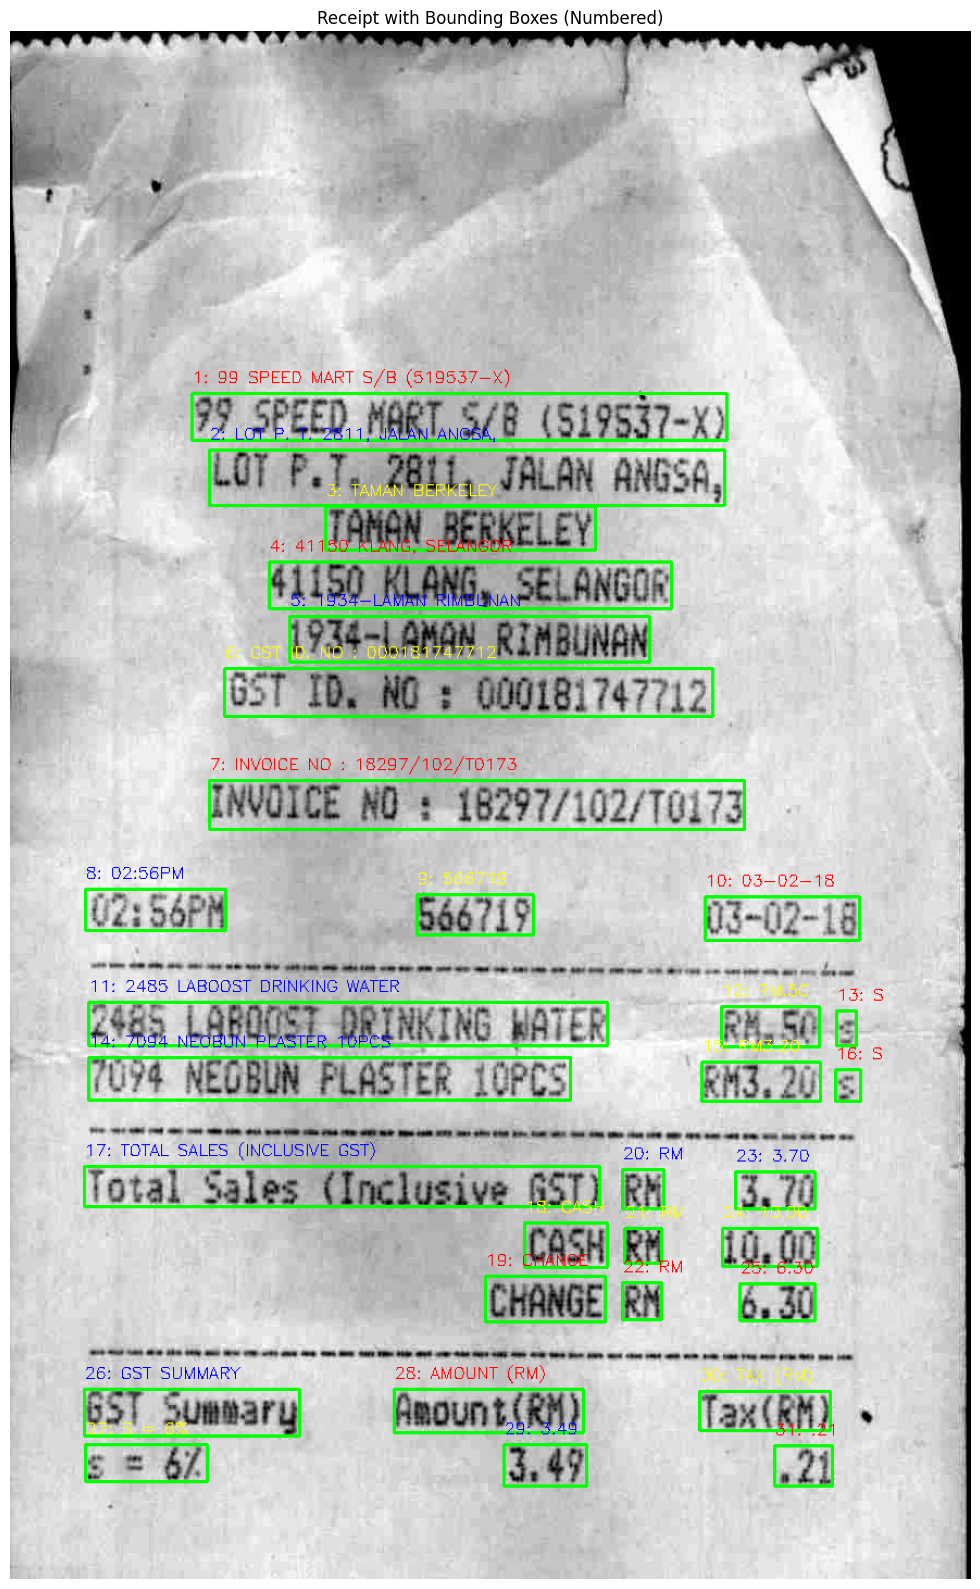

Output saved to output_with_bboxes.jpg


In [12]:
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reading bounding boxes from txt file
with open(txt_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

print(f"Total bounding boxes found: {len(lines)}")

# Drawing bounding boxes
for i, line in enumerate(lines):
    parts = line.strip().split(',')
    
    # Extracting coordinates 
    x1, y1 = int(parts[0]), int(parts[1])
    x2, y2 = int(parts[2]), int(parts[3])
    x3, y3 = int(parts[4]), int(parts[5])
    x4, y4 = int(parts[6]), int(parts[7])
    
    # everything after the 8th comma is text
    text = ','.join(parts[8:])
    
    print(f"Box {i+1}: Text = '{text}'")
    
    # Drawing polygon 
    pts = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], np.int32)
    pts = pts.reshape((-1, 1, 2))
    
    # Drawing the bounding box in green with thickness 2
    cv2.polylines(img_rgb, [pts], isClosed=True, color=(0, 255, 0), thickness=2)
    
    #  text label near the box with different colors for different boxes
    color = (255, 0, 0) if i % 3 == 0 else (0, 0, 255) if i % 3 == 1 else (255, 255, 0)
    cv2.putText(img_rgb, f"{i+1}: {text}", (x1, y1-10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# Display the image with bounding boxes
plt.figure(figsize=(12, 16))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Receipt with Bounding Boxes (Numbered)')
plt.tight_layout()
plt.show()

# Optionally save the output
output_path = 'output_with_bboxes.jpg'
cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))
print(f"Output saved to {output_path}")

character analysis

In [13]:
import glob
from collections import Counter


data_dir = '../Data/0325updated.task1train(626p)-20251119T175414Z-1-001/0325updated.task1train(626p)'
image_files = glob.glob(os.path.join(data_dir, '*.jpg'))
txt_files = glob.glob(os.path.join(data_dir, '*.txt'))

print(f"Total images: {len(image_files)}")
print(f"Total text files: {len(txt_files)}")

# Character analysis
all_texts = []
char_counter = Counter()

for txt_file in txt_files:
    try:
        with open(txt_file, 'r', encoding='utf-8') as f:
            lines = f.readlines()
        
        for line in lines:
            parts = line.strip().split(',')
            if len(parts) >= 9:  
                text = ','.join(parts[8:])
                all_texts.append(text)
                char_counter.update(text)
    except Exception as e:
        print(f"Error reading {txt_file}: {e}")

print(f"\n=== CHARACTER ANALYSIS ===")
print(f"Total text instances: {len(all_texts)}")
print(f"Total unique characters: {len(char_counter)}")
print(f"Total characters (all): {sum(char_counter.values())}")

# Displaying most common characters
print(f"\nTop 20 most common characters:")
for char, count in char_counter.most_common(20):
    print(f"  '{char}': {count}")

# Displaying all unique characters
print(f"\nAll unique characters (sorted):")
all_chars = sorted(char_counter.keys())
print(''.join(all_chars))

Total images: 712
Total text files: 835

=== CHARACTER ANALYSIS ===
Total text instances: 45279
Total unique characters: 72
Total characters (all): 525183

Top 20 most common characters:
  ' ': 53156
  '0': 34658
  'A': 32626
  'T': 26326
  'E': 25296
  'S': 23428
  'N': 21221
  'O': 20991
  'R': 19250
  '1': 17998
  'I': 17609
  '.': 15670
  'L': 14460
  '2': 12512
  'M': 12386
  'C': 11977
  'D': 10711
  'U': 10190
  'G': 9905
  '3': 9768

All unique characters (sorted):
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`lr{|}~·


In [14]:
import pandas as pd

#analysis
def analyze_characters(all_texts):
    
    char_freq = Counter()
    text_lengths = []
    
    for text in all_texts:
        char_freq.update(text)
        text_lengths.append(len(text))
    
    # Creating DataFrame for better analysis
    char_df = pd.DataFrame({
        'character': list(char_freq.keys()),
        'frequency': list(char_freq.values())
    }).sort_values('frequency', ascending=False)
    
    print(f"\n=== DETAILED STATISTICS ===")
    print(f"Total text samples: {len(all_texts)}")
    print(f"Average text length: {np.mean(text_lengths):.2f} chars")
    print(f"Max text length: {max(text_lengths)} chars")
    print(f"Min text length: {min(text_lengths)} chars")
    
    print(f"\nCharacter distribution:")
    print(char_df.head(30))  
    
    return char_df, text_lengths

char_df, text_lengths = analyze_characters(all_texts)


=== DETAILED STATISTICS ===
Total text samples: 45279
Average text length: 11.60 chars
Max text length: 68 chars
Min text length: 1 chars

Character distribution:
   character  frequency
6                 53156
24         0      34658
9          A      32626
0          T      26326
27         E      25296
12         S      23428
2          N      21221
1          O      20991
33         R      19250
22         1      17998
8          I      17609
34         .      15670
5          L      14460
38         2      12512
4          M      12386
10         C      11977
35         D      10711
21         U      10190
28         G       9905
31         3       9768
16         5       9032
36         :       8542
13         H       8083
14         P       7825
37         6       7641
19         4       7610
17         8       7379
18         7       6805
15         9       6216
25         B       5308


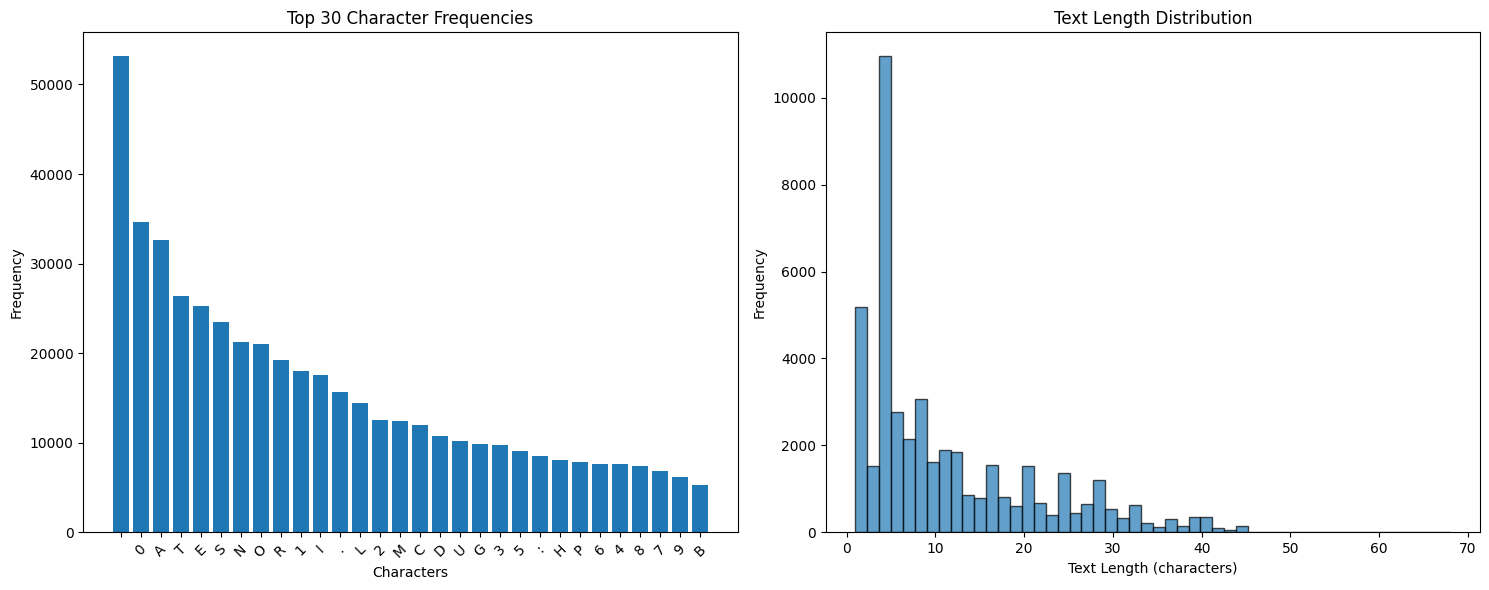

In [15]:
import seaborn as sns

def visualize_character_distribution(char_counter, top_n=30):
    # Get top N characters
    top_chars = char_counter.most_common(top_n)
    chars, counts = zip(*top_chars)
    
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    plt.bar(range(len(chars)), counts)
    plt.xticks(range(len(chars)), chars, rotation=45)
    plt.title(f'Top {top_n} Character Frequencies')
    plt.xlabel('Characters')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    # Text length distribution
    plt.hist(text_lengths, bins=50, alpha=0.7, edgecolor='black')
    plt.title('Text Length Distribution')
    plt.xlabel('Text Length (characters)')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

visualize_character_distribution(char_counter)

 Character Categories Analysis

In [16]:
def analyze_character_categories(char_counter):
    categories = {
        'Digits': 0,
        'Uppercase Letters': 0,
        'Lowercase Letters': 0,
        'Special Characters': 0,
        'Spaces': 0,
        'Others': 0
    }
    
    for char, count in char_counter.items():
        if char.isdigit():
            categories['Digits'] += count
        elif char.isupper():
            categories['Uppercase Letters'] += count
        elif char.islower():
            categories['Lowercase Letters'] += count
        elif char.isspace():
            categories['Spaces'] += count
        elif char in '!@#$%^&*()_+-=[]{}|;:,.<>?/':
            categories['Special Characters'] += count
        else:
            categories['Others'] += count
    
    print(f"\n=== CHARACTER CATEGORIES ===")
    for category, count in categories.items():
        percentage = (count / sum(char_counter.values())) * 100
        print(f"{category}: {count} ({percentage:.2f}%)")
    
    return categories

categories = analyze_character_categories(char_counter)


=== CHARACTER CATEGORIES ===
Digits: 119619 (22.78%)
Uppercase Letters: 302964 (57.69%)
Lowercase Letters: 2 (0.00%)
Special Characters: 48917 (9.31%)
Spaces: 53156 (10.12%)
Others: 525 (0.10%)


Saving Character Vocabulary

In [17]:
def create_character_vocabulary(char_counter, min_frequency=1):
    # Filtering by minimum frequency
    filtered_chars = {char: count for char, count in char_counter.items() 
                     if count >= min_frequency}
    
    # Creating vocabulary with special tokens
    vocabulary = ['[PAD]', '[UNK]', '[START]', '[END]'] + sorted(filtered_chars.keys())
    
    # Creating mapping dictionaries
    char_to_idx = {char: idx for idx, char in enumerate(vocabulary)}
    idx_to_char = {idx: char for char, idx in char_to_idx.items()}
    
    print(f"\n=== VOCABULARY ===")
    print(f"Vocabulary size: {len(vocabulary)}")
    print(f"Characters (first 50): {''.join(vocabulary[4:54])}")  
    
    # Saving vocabulary
    with open('character_vocabulary.txt', 'w', encoding='utf-8') as f:
        for char in vocabulary:
            f.write(f"{char}\n")
    
    return vocabulary, char_to_idx, idx_to_char

vocabulary, char_to_idx, idx_to_char = create_character_vocabulary(char_counter)


=== VOCABULARY ===
Vocabulary size: 76
Characters (first 50):  !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQ


Per-File Analysis

In [18]:
def analyze_per_file_distribution(txt_files, sample_size=10):
    print(f"\n=== SAMPLE FILE ANALYSIS ===")
    
    file_char_counts = []
    file_text_counts = []
    
    for i, txt_file in enumerate(txt_files[:sample_size]):
        try:
            with open(txt_file, 'r', encoding='utf-8') as f:
                lines = f.readlines()
            
            file_texts = []
            for line in lines:
                parts = line.strip().split(',')
                if len(parts) >= 9:
                    text = ','.join(parts[8:])
                    file_texts.append(text)
            
            file_char_count = sum(len(text) for text in file_texts)
            file_char_counts.append(file_char_count)
            file_text_counts.append(len(file_texts))
            
            print(f"File {i+1}: {len(file_texts)} texts, {file_char_count} chars")
            
        except Exception as e:
            print(f"Error reading {txt_file}: {e}")
    
    print(f"\nAverage per file: {np.mean(file_text_counts):.1f} texts, {np.mean(file_char_counts):.1f} chars")

analyze_per_file_distribution(txt_files)


=== SAMPLE FILE ANALYSIS ===
File 1: 48 texts, 549 chars
File 2: 76 texts, 816 chars
File 3: 28 texts, 403 chars
File 4: 40 texts, 566 chars
File 5: 50 texts, 580 chars
File 6: 50 texts, 583 chars
File 7: 40 texts, 598 chars
File 8: 53 texts, 597 chars
File 9: 93 texts, 929 chars
File 10: 48 texts, 642 chars

Average per file: 52.6 texts, 626.3 chars


Quick summary

In [19]:
def quick_character_analysis(data_dir):
    """Quick analysis of all text files in directory"""
    txt_files = glob.glob(os.path.join(data_dir, '*.txt'))
    char_counter = Counter()
    total_texts = 0
    
    for txt_file in txt_files:
        with open(txt_file, 'r', encoding='utf-8') as f:
            for line in f:
                parts = line.strip().split(',')
                if len(parts) >= 9:
                    text = ','.join(parts[8:])
                    char_counter.update(text)
                    total_texts += 1
    
    print(f"Total files: {len(txt_files)}")
    print(f"Total text instances: {total_texts}")
    print(f"Unique characters: {len(char_counter)}")
    print(f"Character set: {''.join(sorted(char_counter.keys()))}")
    
    return char_counter
char_counter = quick_character_analysis(data_dir)

Total files: 835
Total text instances: 45279
Unique characters: 72
Character set:  !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`lr{|}~·


In [20]:
CHARACTERS = ' !"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`lr{|}~·'
#  special tokens for CTC loss
PADDING_TOKEN = '[PAD]'
UNKNOWN_TOKEN = '[UNK]'
START_TOKEN = '[START]'
END_TOKEN = '[END]'

VOCABULARY = [PADDING_TOKEN, UNKNOWN_TOKEN, START_TOKEN, END_TOKEN] + list(CHARACTERS)
char_to_idx = {char: idx for idx, char in enumerate(VOCABULARY)}
idx_to_char = {idx: char for char, idx in char_to_idx.items()}

print(f"Final vocabulary size: {len(VOCABULARY)}")
print(f"Characters: {CHARACTERS}")

Final vocabulary size: 76
Characters:  !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`lr{|}~·


and i have 2 rare character which is lower case also Average text length: 11.60 chars whhich is Short text sequences  may not capture contextual patterns well

In [21]:
from pathlib import Path
from datetime import datetime

# Configuration
data_dir = '../Data/0325updated.task1train(626p)-20251119T175414Z-1-001/0325updated.task1train(626p)'
backup_dir = os.path.join(data_dir, f'backup_lowercase_files_{datetime.now().strftime("%Y%m%d_%H%M%S")}')

txt_files = glob.glob(os.path.join(data_dir, '*.txt'))

print(f"Found {len(txt_files)} text files")
print("Scanning for files with lowercase characters...\n")
print("="*60)

# Statistics
total_files_scanned = 0
total_files_with_lowercase = 0
total_lowercase_converted = 0
files_with_lowercase = []

# Identifing files with lowercase
for txt_file in txt_files:
    total_files_scanned += 1
    filename = os.path.basename(txt_file)
    
    try:
        with open(txt_file, 'r', encoding='utf-8') as f:
            content = f.read()
        
        lowercase_count = sum(1 for c in content if c.islower())
        
        if lowercase_count > 0:
            files_with_lowercase.append((txt_file, filename, lowercase_count, content))
            print(f"Found: {filename} ({lowercase_count} lowercase chars)")
    
    except Exception as e:
        print(f"✗ Error reading {filename}: {str(e)}")

print(f"{'='*60}\n")

if not files_with_lowercase:
    print("✓ No files with lowercase characters found!")
    print("All files are already in uppercase.")
else:
    # Creating backup directory only if needed
    os.makedirs(backup_dir, exist_ok=True)
    print(f"Found {len(files_with_lowercase)} files with lowercase characters")
    print(f"Backup directory created: {backup_dir}\n")
    print("="*60)
    
    # backup and convert only files with lowercase
    for txt_file, filename, lowercase_count, original_content in files_with_lowercase:
        try:
            # Creating backup
            backup_path = os.path.join(backup_dir, filename)
            with open(backup_path, 'w', encoding='utf-8') as f:
                f.write(original_content)
            
            # Converting to uppercase
            converted_content = original_content.upper()
            
            # Writing back to original file
            with open(txt_file, 'w', encoding='utf-8') as f:
                f.write(converted_content)
            
            total_files_with_lowercase += 1
            total_lowercase_converted += lowercase_count
            
            print(f"✓ Converted: {filename} ({lowercase_count} chars)")
        
        except Exception as e:
            print(f"✗ Error processing {filename}: {str(e)}")
    
    print(f"\n{'='*60}")
    print("CONVERSION SUMMARY")
    print(f"{'='*60}")
    print(f"Total files scanned: {total_files_scanned}")
    print(f"Files with lowercase: {total_files_with_lowercase}")
    print(f"Files converted: {total_files_with_lowercase}")
    print(f"Total lowercase characters converted: {total_lowercase_converted}")
    print(f"\nBackup location:\n{backup_dir}")
    print(f"{'='*60}")
    
    # Verifying the conversion
    print("\n" + "="*60)
    print("VERIFICATION")
    print("="*60)
    verification_passed = True
    
    for txt_file, filename, _, _ in files_with_lowercase:
        with open(txt_file, 'r', encoding='utf-8') as f:
            content = f.read()
            remaining_lowercase = sum(1 for c in content if c.islower())
            
            if remaining_lowercase > 0:
                print(f"⚠ {filename}: still has {remaining_lowercase} lowercase chars")
                verification_passed = False
    
    if verification_passed:
        print("✓ SUCCESS! All lowercase characters converted to uppercase!")
        print(f"✓ {total_files_with_lowercase} files updated")
        print(f"✓ Original files backed up safely")
    else:
        print("⚠ Some files may need manual review")
    
    print("="*60)
    
    print("\n Dataset Update:")
    print(f"  Vocabulary size: 76 → 74 (removed 2 lowercase chars)")
    print(f"  Lowercase letters: 2 → 0")
    print(f"  Files modified: {total_files_with_lowercase}/{total_files_scanned}")

Found 835 text files
Scanning for files with lowercase characters...

Found: X51008142068.txt (1 lowercase chars)
Found: X51006466055.txt (1 lowercase chars)

Found 2 files with lowercase characters
Backup directory created: ../Data/0325updated.task1train(626p)-20251119T175414Z-1-001/0325updated.task1train(626p)/backup_lowercase_files_20251125_195757

✓ Converted: X51008142068.txt (1 chars)
✓ Converted: X51006466055.txt (1 chars)

CONVERSION SUMMARY
Total files scanned: 835
Files with lowercase: 2
Files converted: 2
Total lowercase characters converted: 2

Backup location:
../Data/0325updated.task1train(626p)-20251119T175414Z-1-001/0325updated.task1train(626p)/backup_lowercase_files_20251125_195757

VERIFICATION
✓ SUCCESS! All lowercase characters converted to uppercase!
✓ 2 files updated
✓ Original files backed up safely

 Dataset Update:
  Vocabulary size: 76 → 74 (removed 2 lowercase chars)
  Lowercase letters: 2 → 0
  Files modified: 2/835


In [18]:
all_chars = set()
for txt_file in glob.glob(os.path.join(data_dir, '*.txt')):
    with open(txt_file, 'r', encoding='utf-8') as f:
        all_chars.update(f.read())

print(f"Unique characters: {len(all_chars)}")
print(f"Character set: {''.join(sorted(all_chars))}")

Unique characters: 71
Character set: 
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`{|}~·


In [22]:

output_dir = '../Data/vocabulary'
os.makedirs(output_dir, exist_ok=True)

print("="*60)
print("VOCABULARY MAPPING SETUP")
print("="*60)

# Step 1: Collect all unique characters from dataset
print("\n1. Scanning dataset for unique characters...")
all_chars = set()
char_frequency = Counter()
txt_files = glob.glob(os.path.join(data_dir, '*.txt'))

for txt_file in txt_files:
    with open(txt_file, 'r', encoding='utf-8') as f:
        content = f.read()
        all_chars.update(content)
        char_frequency.update(content)

print(f"   Found {len(all_chars)} unique characters")

VOCABULARY MAPPING SETUP

1. Scanning dataset for unique characters...
   Found 71 unique characters


In [23]:
def char_sort_key(char):
    if char == ' ':
        return (0, 0)
    elif char.isdigit():
        return (1, ord(char))
    elif char.isupper():
        return (2, ord(char))
    else:
        return (3, ord(char))

sorted_chars = sorted(all_chars, key=char_sort_key)

In [21]:
sorted_chars

[' ',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '\n',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '·']

In [24]:
# Step 3: Add special tokens
print("\n2. Adding special tokens...")
special_tokens = {
    '<PAD>': 0,   # Padding token
    '<SOS>': 1,   # Start of sequence
    '<EOS>': 2,   # End of sequence
    '<UNK>': 3,   # Unknown character
}

print(f"   Special tokens: {list(special_tokens.keys())}")


2. Adding special tokens...
   Special tokens: ['<PAD>', '<SOS>', '<EOS>', '<UNK>']


In [25]:
# Step 4: Create mappings
print("\n3. Creating character-to-index mappings...")

# Character to index including special tokens
char_to_idx = special_tokens.copy()
for idx, char in enumerate(sorted_chars, start=len(special_tokens)):
    char_to_idx[char] = idx

# Index to character
idx_to_char = {idx: char for char, idx in char_to_idx.items()}
vocab_size = len(char_to_idx)

print(f"   Vocabulary size: {vocab_size}")
print(f"   Regular characters: {len(sorted_chars)}")
print(f"   Special tokens: {len(special_tokens)}")


3. Creating character-to-index mappings...
   Vocabulary size: 75
   Regular characters: 71
   Special tokens: 4


In [26]:
# Step 4: Create mappings
print("\n3. Creating character-to-index mappings...")

# Character to index including special tokens
char_to_idx = special_tokens.copy()
for idx, char in enumerate(sorted_chars, start=len(special_tokens)):
    char_to_idx[char] = idx

# Index to character
idx_to_char = {idx: char for char, idx in char_to_idx.items()}
vocab_size = len(char_to_idx)

print(f"   Vocabulary size: {vocab_size}")
print(f"   Regular characters: {len(sorted_chars)}")
print(f"   Special tokens: {len(special_tokens)}")


3. Creating character-to-index mappings...
   Vocabulary size: 75
   Regular characters: 71
   Special tokens: 4


In [27]:
# Step 5: Display vocabulary structure
print("\n4. Vocabulary structure:")
print(f"   Indices 0-3: Special tokens")
print(f"   Index 4: Space ' '")
print(f"   Indices 5-14: Digits (0-9)")
print(f"   Indices 15-40: Uppercase letters (A-Z)")
print(f"   Remaining: Special characters")



4. Vocabulary structure:
   Indices 0-3: Special tokens
   Index 4: Space ' '
   Indices 5-14: Digits (0-9)
   Indices 15-40: Uppercase letters (A-Z)
   Remaining: Special characters


In [28]:
# Step 6: Character frequency analysis
print("\n6. Top 10 most frequent characters:")
for char, freq in char_frequency.most_common(10):
    char_display = 'SPACE' if char == ' ' else char
    print(f"   '{char_display}' → Index {char_to_idx[char]}: {freq:,} occurrences")


6. Top 10 most frequent characters:
   ',' → Index 53: 365,542 occurrences
   '1' → Index 6: 194,072 occurrences
   '2' → Index 7: 144,432 occurrences
   '3' → Index 8: 132,266 occurrences
   '5' → Index 10: 131,104 occurrences
   '4' → Index 9: 127,138 occurrences
   '6' → Index 11: 121,599 occurrences
   '0' → Index 5: 121,538 occurrences
   '7' → Index 12: 109,231 occurrences
   '8' → Index 13: 101,835 occurrences


In [29]:
import json
# Step 6: Save vocabulary mappings
print("\n7. Saving vocabulary files...")

# Save as JSON (human-readable)
json_path = os.path.join(output_dir, 'char_to_idx.json')
with open(json_path, 'w', encoding='utf-8') as f:
    json.dump(char_to_idx, f, ensure_ascii=False, indent=2)
print(f"   ✓ Saved: {json_path}")


7. Saving vocabulary files...
   ✓ Saved: ../Data/vocabulary/char_to_idx.json


In [30]:
import pickle

idx_to_char_json_path = os.path.join(output_dir, 'idx_to_char.json')
with open(idx_to_char_json_path, 'w', encoding='utf-8') as f:
    # Converting int keys to strings for JSON
    idx_to_char_str = {str(k): v for k, v in idx_to_char.items()}
    json.dump(idx_to_char_str, f, ensure_ascii=False, indent=2)
print(f"Saved: {idx_to_char_json_path}")

# Saving as pickle
pickle_path = os.path.join(output_dir, 'vocabulary.pkl')
with open(pickle_path, 'wb') as f:
    pickle.dump({
        'char_to_idx': char_to_idx,
        'idx_to_char': idx_to_char,
        'vocab_size': vocab_size,
        'sorted_chars': sorted_chars,
        'special_tokens': special_tokens
    }, f)
print(f"Saved: {pickle_path}")

# Saving character set as text file
charset_path = os.path.join(output_dir, 'character_set.txt')
with open(charset_path, 'w', encoding='utf-8') as f:
    f.write(f"Vocabulary Size: {vocab_size}\n")
    f.write(f"Special Tokens: {len(special_tokens)}\n")
    f.write(f"Regular Characters: {len(sorted_chars)}\n\n")
    f.write(f"Character Set:\n{''.join(sorted_chars)}\n")
print(f"Saved: {charset_path}")


# Summary
print("\n" + "="*60)
print("VOCABULARY SETUP COMPLETE!")
print("="*60)
print(f"Output directory: {output_dir}")
print(f"\nFiles created:")
print(f"  1. char_to_idx.json       - Character to index mapping")
print(f"  2. idx_to_char.json       - Index to character mapping")
print(f"  3. vocabulary.pkl         - Complete vocabulary (pickle)")
print(f"  4. character_set.txt      - Human-readable character set")
print(f"\nVocabulary size: {vocab_size}")
print("="*60)

# testing
print("\n" + "="*60)
print("QUICK TEST")
print("="*60)
test_text = "HELLO WORLD"
test_encoded = [char_to_idx.get(c, char_to_idx['<UNK>']) for c in test_text]
test_decoded = ''.join([idx_to_char[idx] for idx in test_encoded])

print(f"Original:  '{test_text}'")
print(f"Encoded:   {test_encoded}")
print(f"Decoded:   '{test_decoded}'")
print(f"Match:     {test_text == test_decoded} ✓")
print("="*60)

Saved: ../Data/vocabulary/idx_to_char.json
Saved: ../Data/vocabulary/vocabulary.pkl
Saved: ../Data/vocabulary/character_set.txt

VOCABULARY SETUP COMPLETE!
Output directory: ../Data/vocabulary

Files created:
  1. char_to_idx.json       - Character to index mapping
  2. idx_to_char.json       - Index to character mapping
  3. vocabulary.pkl         - Complete vocabulary (pickle)
  4. character_set.txt      - Human-readable character set

Vocabulary size: 75

QUICK TEST
Original:  'HELLO WORLD'
Encoded:   [22, 19, 26, 26, 29, 4, 37, 29, 32, 26, 18]
Decoded:   'HELLO WORLD'
Match:     True ✓


In [ ]:
import os
import re
import shutil
from pathlib import Path

def parse_text_from_coordinates(text_content):
    """
    Extract text labels from coordinate data
    
    Format appears to be: x1,y1,x2,y2,x3,y3,x4,y4,TEXT_LABEL,more_coords,more_text...
    """
    # Split by comma
    parts = text_content.split(',')
    
    # Extract non-numeric parts (these are the text labels)
    text_parts = []
    for part in parts:
        part = part.strip()
        # Check if it's NOT a number (i.e., it's text)
        if part and not part.replace('.', '').replace('-', '').isdigit():
            text_parts.append(part)
    extracted_text = ' '.join(text_parts)
    return extracted_text


def analyze_coordinate_format(input_dir, num_samples=10):
    """
    Analyze the format of coordinate text files
    """
    print("="*60)
    print("ANALYZING COORDINATE TEXT FORMAT")
    print("="*60)
    
    txt_files = [f for f in os.listdir(input_dir) if f.endswith('.txt')]
    
    print(f"\nAnalyzing {min(num_samples, len(txt_files))} sample files...\n")
    
    for txt_file in txt_files[:num_samples]:
        txt_path = os.path.join(input_dir, txt_file)
        
        with open(txt_path, 'r', encoding='utf-8') as f:
            original = f.read().strip()
        
        # Extract text
        extracted = parse_text_from_coordinates(original)
        
        print(f"📄 {txt_file}")
        print(f"   Original length: {len(original)} chars")
        print(f"   Original: {original[:100]}...")
        print(f"   Extracted length: {len(extracted)} chars")
        print(f"   Extracted: {extracted[:100]}")
        print()
    
    return True


def clean_text_files(input_dir, output_dir=None, backup=True):
    """
    Clean text files by extracting only text labels (removing coordinates)
    
    Args:
        input_dir: Directory with original text files
        output_dir: Output directory (default: creates 'cleaned_text_data')
        backup: If True, backup original files
    """
    
    if output_dir is None:
        output_dir = os.path.join(os.path.dirname(input_dir), 'cleaned_text_data')
    
    # Create backup if requested
    if backup:
        backup_dir = os.path.join(os.path.dirname(input_dir), 'text_backup_original')
        if not os.path.exists(backup_dir):
            print(f"📦 Creating backup: {backup_dir}")
            shutil.copytree(input_dir, backup_dir)
            print("✅ Backup created")
    
    # Create output directory
    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)
    os.makedirs(output_dir)
    
    print("\n" + "="*60)
    print("CLEANING TEXT FILES")
    print("="*60)
    
    # Get all files
    image_files = [f for f in os.listdir(input_dir) if f.endswith('.png')]
    txt_files = [f for f in os.listdir(input_dir) if f.endswith('.txt')]
    
    print(f"\nProcessing {len(txt_files)} text files...")
    
    stats = {
        'processed': 0,
        'original_lengths': [],
        'cleaned_lengths': [],
        'samples': []
    }
    
    for txt_file in txt_files:
        txt_path = os.path.join(input_dir, txt_file)
        
        # Read original
        with open(txt_path, 'r', encoding='utf-8') as f:
            original_text = f.read().strip()
        
        # Extract text only
        cleaned_text = parse_text_from_coordinates(original_text)
        
        # Save cleaned version
        output_path = os.path.join(output_dir, txt_file)
        with open(output_path, 'w', encoding='utf-8') as f:
            f.write(cleaned_text)
        
        # Copy corresponding image
        img_file = txt_file.replace('.txt', '.png')
        if img_file in image_files:
            img_src = os.path.join(input_dir, img_file)
            img_dst = os.path.join(output_dir, img_file)
            shutil.copy2(img_src, img_dst)
        
        # Track stats
        stats['original_lengths'].append(len(original_text))
        stats['cleaned_lengths'].append(len(cleaned_text))
        stats['processed'] += 1
        
        if len(stats['samples']) < 10:
            stats['samples'].append({
                'file': txt_file,
                'original': original_text[:100],
                'cleaned': cleaned_text,
                'original_len': len(original_text),
                'cleaned_len': len(cleaned_text)
            })
    
    return stats, output_dir


def show_cleaning_results(stats):
    """Display cleaning results"""
    print("\n" + "="*60)
    print("CLEANING RESULTS")
    print("="*60)
    
    print(f"\n✅ Processed: {stats['processed']} files")
    
    print(f"\n📊 Text Length Comparison:")
    print(f"   BEFORE cleaning:")
    print(f"     Min: {min(stats['original_lengths']):5d} | Max: {max(stats['original_lengths']):5d} | Avg: {sum(stats['original_lengths'])/len(stats['original_lengths']):6.1f}")
    
    print(f"   AFTER cleaning:")
    print(f"     Min: {min(stats['cleaned_lengths']):5d} | Max: {max(stats['cleaned_lengths']):5d} | Avg: {sum(stats['cleaned_lengths'])/len(stats['cleaned_lengths']):6.1f}")
    
    reduction = (1 - sum(stats['cleaned_lengths']) / sum(stats['original_lengths'])) * 100
    print(f"\n💾 Size reduction: {reduction:.1f}%")
    
    print(f"\n📄 Sample Transformations:")
    for i, sample in enumerate(stats['samples'][:5], 1):
        print(f"\n{i}. {sample['file']}")
        print(f"   Before ({sample['original_len']} chars): {sample['original']}...")
        print(f"   After  ({sample['cleaned_len']} chars): {sample['cleaned']}")
    
    # Distribution
    cleaned = stats['cleaned_lengths']
    print(f"\n📈 Cleaned Text Distribution:")
    print(f"   Under 20 chars:  {sum(1 for l in cleaned if l < 20):3d} files")
    print(f"   20-50 chars:     {sum(1 for l in cleaned if 20 <= l < 50):3d} files")
    print(f"   50-100 chars:    {sum(1 for l in cleaned if 50 <= l < 100):3d} files")
    print(f"   100-200 chars:   {sum(1 for l in cleaned if 100 <= l < 200):3d} files")
    print(f"   Over 200 chars:  {sum(1 for l in cleaned if l >= 200):3d} files")


def rebuild_vocabulary(cleaned_text_dir, output_vocab_dir):
    """
    Rebuild vocabulary from cleaned text files
    """
    import pickle
    
    print("\n" + "="*60)
    print("REBUILDING VOCABULARY")
    print("="*60)
    
    # Get all characters from cleaned texts
    all_chars = set()
    txt_files = [f for f in os.listdir(cleaned_text_dir) if f.endswith('.txt')]
    
    for txt_file in txt_files:
        with open(os.path.join(cleaned_text_dir, txt_file), 'r', encoding='utf-8') as f:
            text = f.read().strip()
            all_chars.update(text)
    
    # Sort for consistency
    sorted_chars = sorted(list(all_chars))
    
    # Create mappings
    char_to_idx = {char: idx + 3 for idx, char in enumerate(sorted_chars)}
    char_to_idx['<PAD>'] = 0
    char_to_idx['<SOS>'] = 1
    char_to_idx['<EOS>'] = 2
    
    idx_to_char = {idx: char for char, idx in char_to_idx.items()}
    
    # Save vocabulary
    os.makedirs(output_vocab_dir, exist_ok=True)
    
    vocab_data = {
        'char_to_idx': char_to_idx,
        'idx_to_char': idx_to_char,
        'vocab_size': len(char_to_idx)
    }
    
    with open(os.path.join(output_vocab_dir, 'vocabulary.pkl'), 'wb') as f:
        pickle.dump(vocab_data, f)
    
    with open(os.path.join(output_vocab_dir, 'char_to_idx.json'), 'w') as f:
        import json
        json.dump(char_to_idx, f, indent=2, ensure_ascii=False)
    
    with open(os.path.join(output_vocab_dir, 'character_set.txt'), 'w', encoding='utf-8') as f:
        f.write(''.join(sorted_chars))
    
    print(f"\n✅ Vocabulary rebuilt:")
    print(f"   Characters: {len(sorted_chars)}")
    print(f"   Total vocab size: {len(char_to_idx)} (including special tokens)")
    print(f"   Character set: {''.join(list(sorted_chars)[:50])}...")
    print(f"   Saved to: {output_vocab_dir}")
    
    return vocab_data



if __name__ == "__main__":
    # Your data directory
    INPUT_DIR = '../Data/0325updated.task1train(626p)-20251119T175414Z-1-001/good_data/grayscale_standardized_data/'
    
    print("🔍 Step 1: Analyzing current format...\n")
    analyze_coordinate_format(INPUT_DIR, num_samples=5)
    
    input("\nPress Enter to continue with cleaning...")
    
    print("\n🧹 Step 2: Cleaning text files...\n")
    stats, cleaned_dir = clean_text_files(
        input_dir=INPUT_DIR,
        backup=True  # Creates backup of originals
    )
    
    show_cleaning_results(stats)
    
    print("\n📖 Step 3: Rebuilding vocabulary...\n")
    vocab_dir = '../Data/vocabulary_cleaned/'
    vocab_data = rebuild_vocabulary(cleaned_dir, vocab_dir)
    
    print("\n" + "="*60)
    print("✅ COMPLETE!")
    print("="*60)
    print(f"\n📂 Cleaned data: {cleaned_dir}")
    print(f"📖 New vocabulary: {vocab_dir}")
    print(f"💾 Original backup: {os.path.join(os.path.dirname(INPUT_DIR), 'text_backup_original')}")
    
    print("\n🎯 Next steps:")
    print("   1. Use the cleaned data directory for training")
    print("   2. Use the new vocabulary file")
    print("   3. Set max_text_length based on cleaned lengths (recommended: 100-200)")
    
    print("\n📝 Update your dataloader:")
    print("   train_loader, val_loader, dataset = create_dataloaders(")
    print(f"       data_dir='{cleaned_dir}',")
    print(f"       vocab_path='{os.path.join(vocab_dir, 'vocabulary.pkl')}',")
    print("       batch_size=32,")
    print("       max_text_length=150  # Adjust based on results above")
    print("   )")

🔍 Step 1: Analyzing current format...

ANALYZING COORDINATE TEXT FORMAT

Analyzing 5 sample files...

📄 X51006311764(1).txt
   Original length: 2176 chars
   Original: 238,225,495,225,495,253,238,253,TONYMOLY VIVA CITY
198,261,524,261,524,293,198,293,(TONYMOLY SHOP (9...
   Extracted length: 752 chars
   Extracted: TONYMOLY VIVA CITY
198 (TONYMOLY SHOP (95874))
138 UNIT L1-044B VIVACITY MEGAMALL JALAN WAN ALWI 933

📄 X51005200938.txt
   Original length: 3377 chars
   Original: 366,241,597,241,597,259,366,259,PERNIAGAAN ZHENG HUI
435,263,526,263,526,283,435,283,JM0325955-V
391...
   Extracted length: 1191 chars
   Extracted: PERNIAGAAN ZHENG HUI
435 JM0325955-V
391 NO.59 JALAN PERMAS 9/5
377 BANDAR BARU PERMAS JAYA
407 8176

📄 X51005605285.txt
   Original length: 1881 chars
   Original: 137,101,534,101,534,139,137,139,AEON CO. (M) BHD. (126926-H)
121,139,533,139,533,174,121,174,3 FLOOR...
   Extracted length: 748 chars
   Extracted: AEON CO. (M) BHD. (126926-H)
121 3 FLOOR AEON TAMAN MA

In [33]:
def parse_text_from_coordinates_improved(text_content):
    """
    Improved parser for coordinate-text format.
    Each line: x1,y1,x2,y2,x3,y3,x4,y4,TEXT_LABEL
    """
    lines = text_content.strip().split('\n')
    text_lines = []
    
    for line in lines:
        line = line.strip()
        if not line:
            continue
            
        # Split by commas
        parts = [p.strip() for p in line.split(',')]
        
        if len(parts) < 9:  # Need at least 8 coordinates + 1 text
            continue
            
        # The text part starts after the 8 coordinates
        # Join remaining parts in case text contains commas
        text_part = ','.join(parts[8:]).strip()
        
        if text_part:
            text_lines.append(text_part)
    
    # Join with spaces to create a continuous text sequence
    return ' '.join(text_lines)

# Alternative: More robust version with regex
def parse_text_with_regex(text_content):
    """
    Use regex to extract text that comes after coordinates
    """
    lines = text_content.strip().split('\n')
    text_parts = []
    
    # Pattern: start of line, 8 numbers with commas, then text
    pattern = r'^\s*(?:\d+\s*,\s*){7}\d+\s*,\s*(.+)'
    
    for line in lines:
        match = re.match(pattern, line)
        if match:
            text = match.group(1).strip()
            if text:
                text_parts.append(text)
    
    return ' '.join(text_parts)